In [3]:
import kagglehub
cooperunion_anime_recommendations_database_path = kagglehub.dataset_download('CooperUnion/anime-recommendations-database')

print('Data source import complete.')

100%|██████████| 25.0M/25.0M [00:01<00:00, 16.2MB/s]

Extracting files...


Data source import complete.


In [4]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [5]:
df1=pd.read_csv('/content/anime.csv')
df1.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170,182126,131625,62330,20688,8904,3184,1357,741,1580
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043,49201,49505,22632,5805,1877,577,221,109,379
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229,75651,86142,49432,15376,5838,1965,664,316,533
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182,4806,10128,11618,5709,2920,1083,353,164,131
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312,529,1242,1713,1068,634,265,83,50,27


In [8]:
df2=pd.read_excel('/content/rating.csv.xlsx')
df2.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [9]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [10]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [11]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [12]:
nRowsRead = 10 # specify 'None' if want to read whole file
# anime.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('anime.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'anime.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 10 rows and 35 columns


In [13]:
df1.head(5)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170,182126,131625,62330,20688,8904,3184,1357,741,1580
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043,49201,49505,22632,5805,1877,577,221,109,379
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229,75651,86142,49432,15376,5838,1965,664,316,533
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182,4806,10128,11618,5709,2920,1083,353,164,131
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312,529,1242,1713,1068,634,265,83,50,27


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import math

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nRow, nCol = df.shape
    nGraphRow = int(math.ceil(nGraphShown / nGraphPerRow))  # ✅ Ensure integer

    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')

    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]

        if not np.issubdtype(columnDf.dtype, np.number):
            columnDf = columnDf.astype(str)
            columnDf.value_counts().plot(kind='bar')
        else:
            columnDf.plot(kind='hist', bins=20)

        plt.title(f'Distribution of {df.columns[i]}')

    plt.tight_layout()
    plt.show()

/tmp/ipython-input-14-4167474863.py:23: UserWarning: Glyph 12459 (\N{KATAKANA LETTER KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-14-4167474863.py:23: UserWarning: Glyph 12454 (\N{KATAKANA LETTER U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-14-4167474863.py:23: UserWarning: Glyph 12508 (\N{KATAKANA LETTER BO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-14-4167474863.py:23: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-14-4167474863.py:23: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-14-4167474863.py:23: UserWarning: Glyph 12499 (\N{KATAKANA LETTER BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-14-4167474863.py:23: UserWarning: Glyph 12496 (\N{KATAKANA LETTER BA}) missing from font(s) D

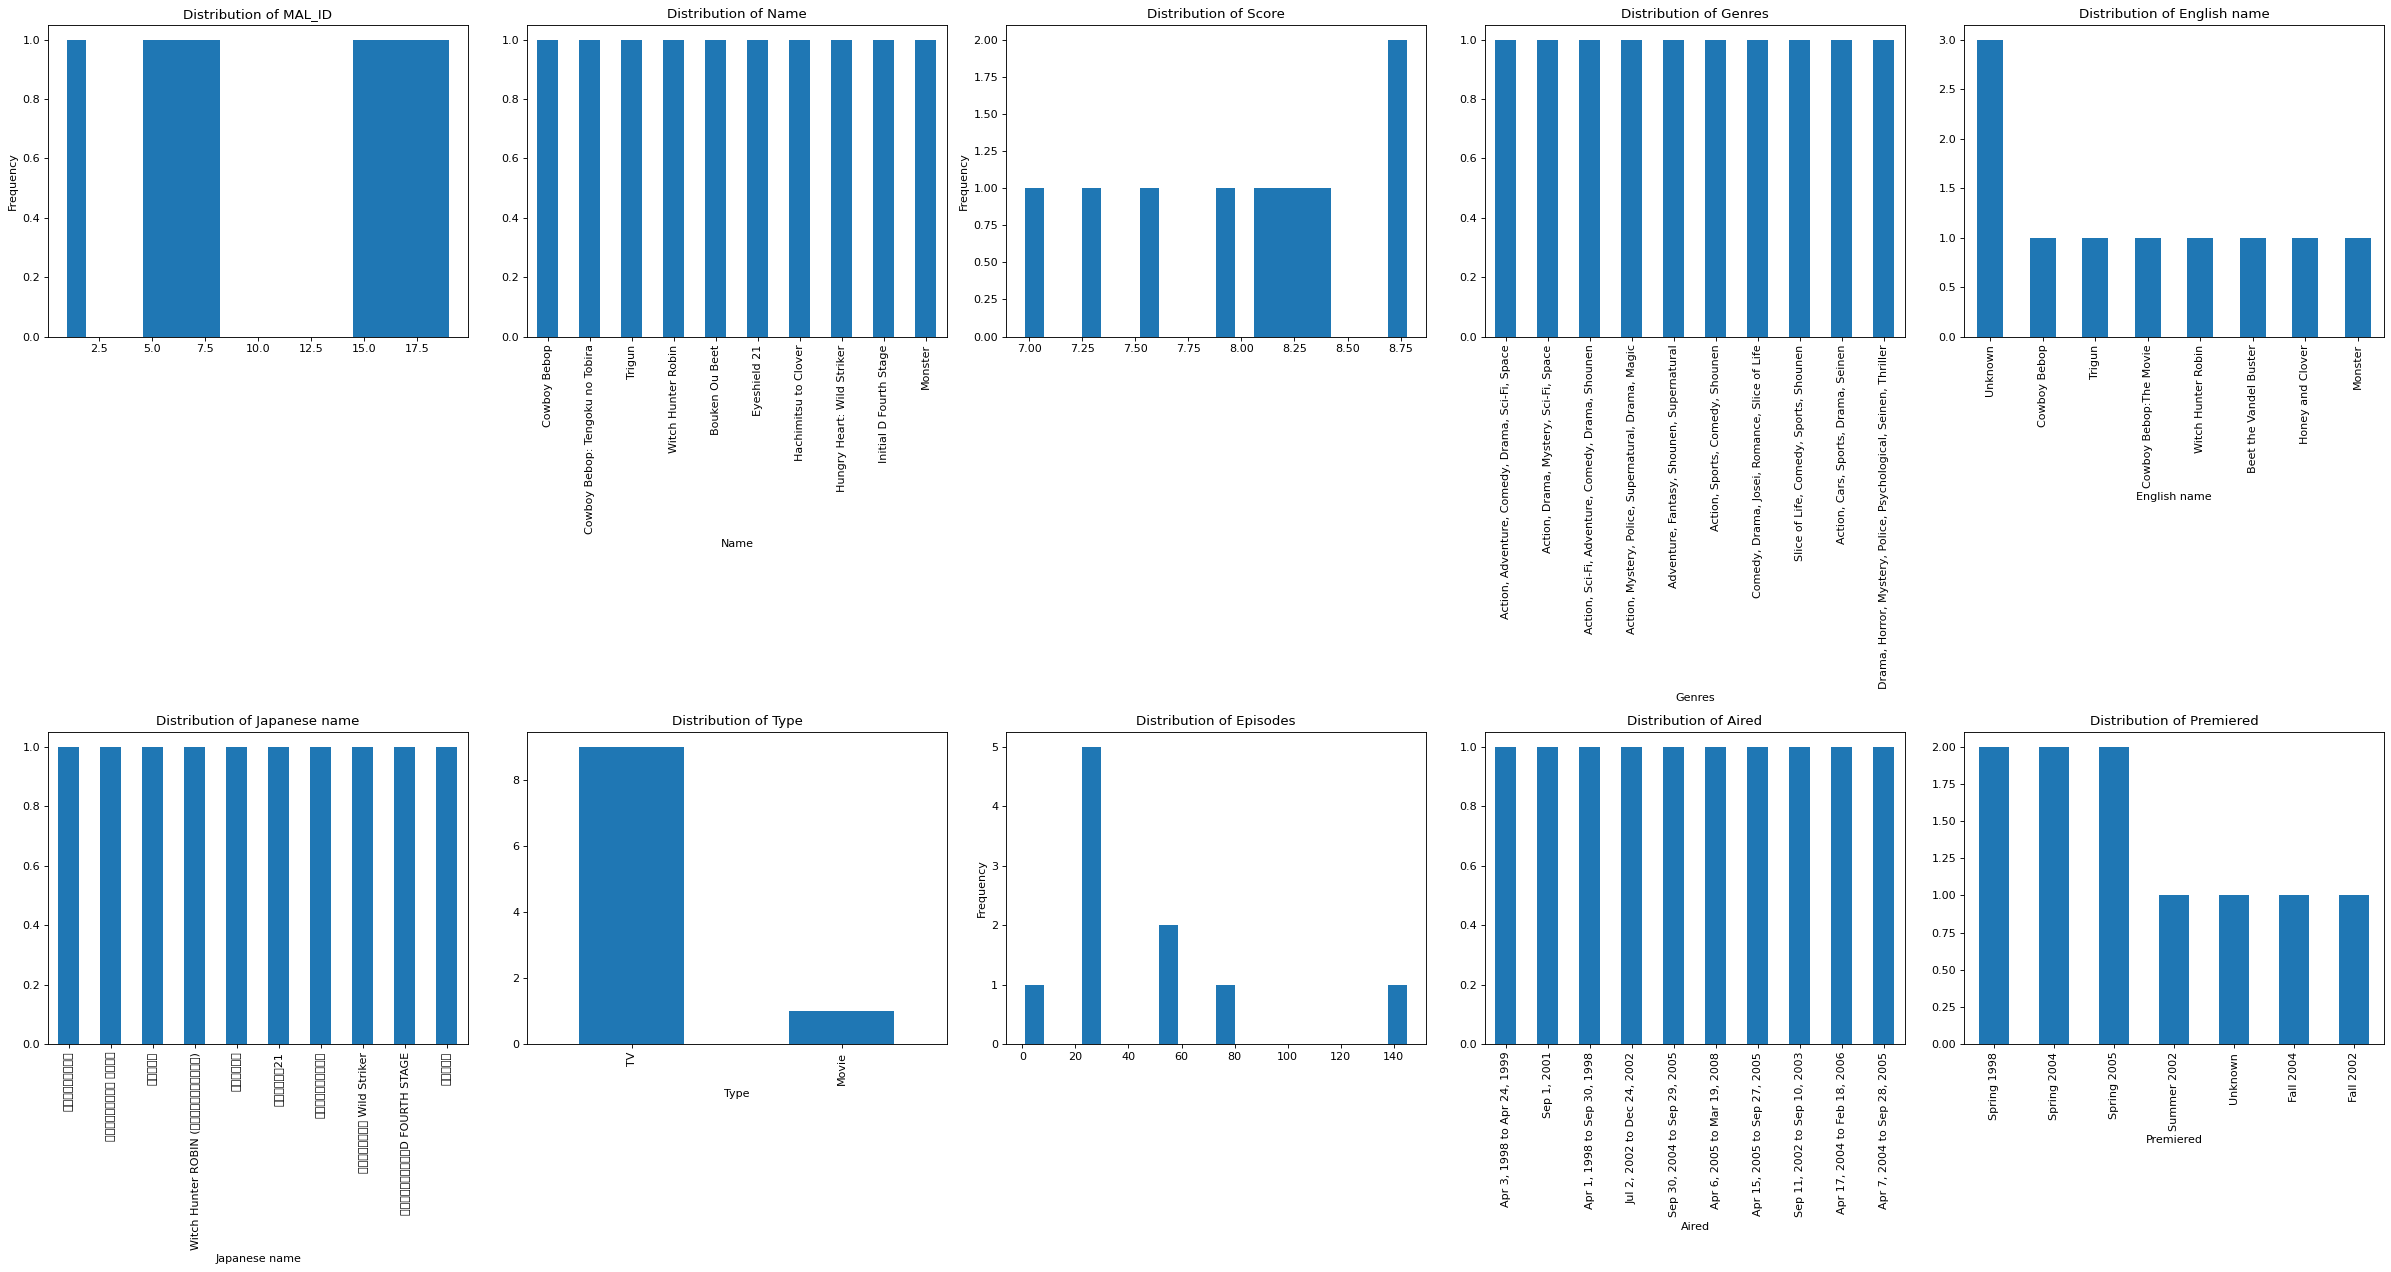

In [15]:
plotPerColumnDistribution(df1, 10, 5)

In [16]:
import seaborn as sns

def plotCorrelationMatrix(df, graphWidth):
    # Optional: give a name if needed
    filename = getattr(df, "dataframeName", "DataFrame")

    # Select only numerical columns
    df_numeric = df.select_dtypes(include=np.number) # ✅ Select only numerical columns

    df_numeric = df_numeric.dropna(axis='columns')
    df_numeric = df_numeric[[col for col in df_numeric if df_numeric[col].nunique() > 1]]

    if df_numeric.shape[1] < 2:
        print(f"Not enough columns for correlation matrix in {filename}")
        return

    corr = df_numeric.corr() # ✅ Calculate correlation on numerical columns only
    plt.figure(figsize=(graphWidth, graphWidth))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
    plt.title(f'Correlation Matrix for {filename}')
    plt.show()

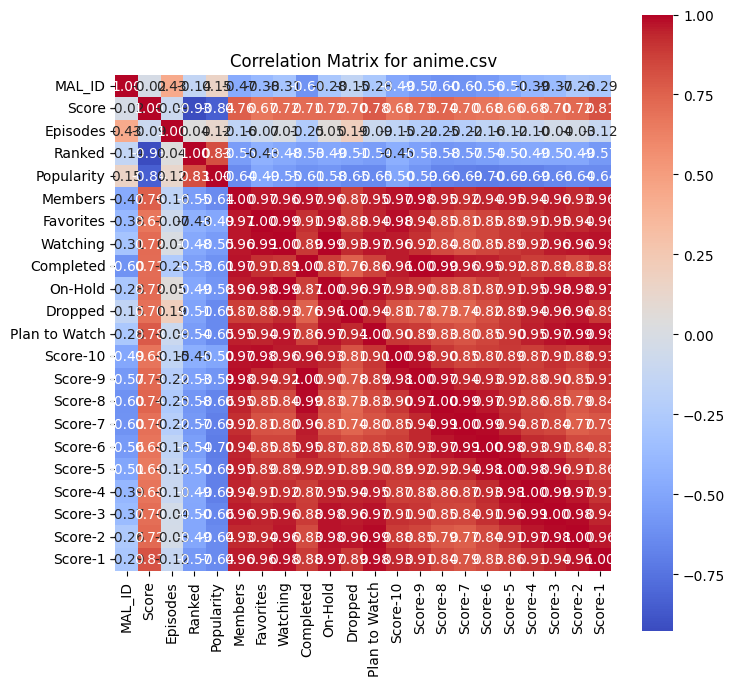

In [17]:
plotCorrelationMatrix(df1, 8)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix

def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include=[np.number])  # keep only numeric columns

    df = df.dropna(axis='columns')  # ✅ Fix: drop columns with NaNs
    df = df[[col for col in df if df[col].nunique() > 1]]  # keep columns with >1 unique values

    if df.shape[1] > 10:  # avoid plotting too many columns
        df = df.iloc[:, :10]

    columnNames = list(df)
    fig, ax = plt.subplots(figsize=(plotSize, plotSize))
    scatter_matrix(df, alpha=0.75, figsize=(plotSize, plotSize), diagonal='hist')
    plt.suptitle('Scatter Matrix for Numerical Features', fontsize=textSize)
    plt.show()

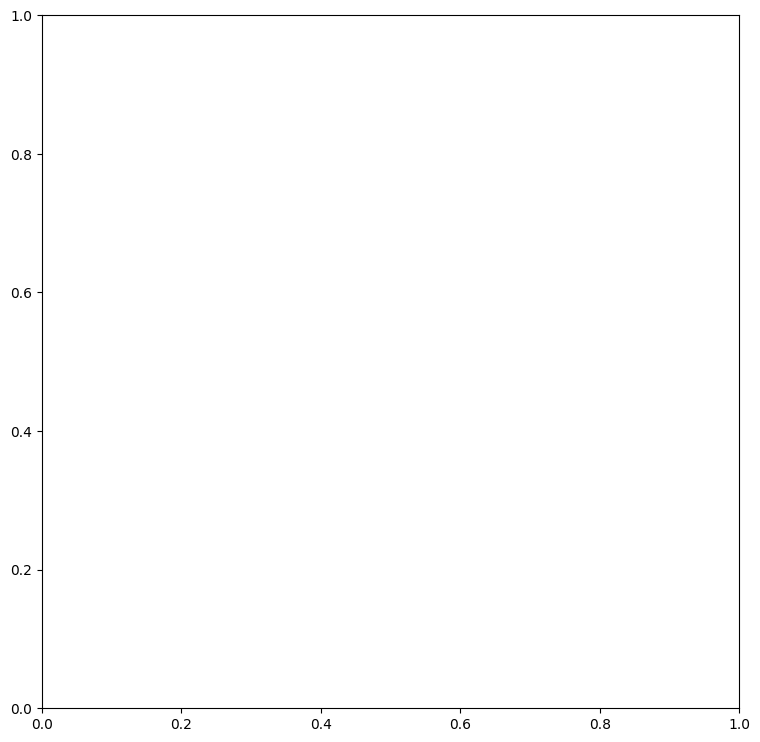

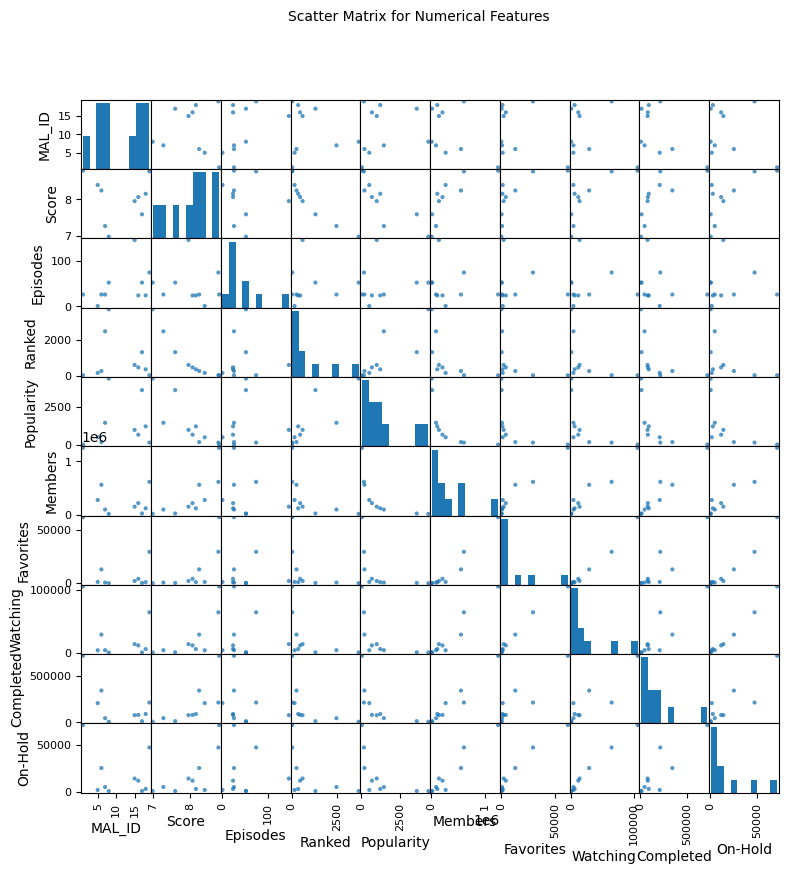

In [19]:
plotScatterMatrix(df1, 9, 10)

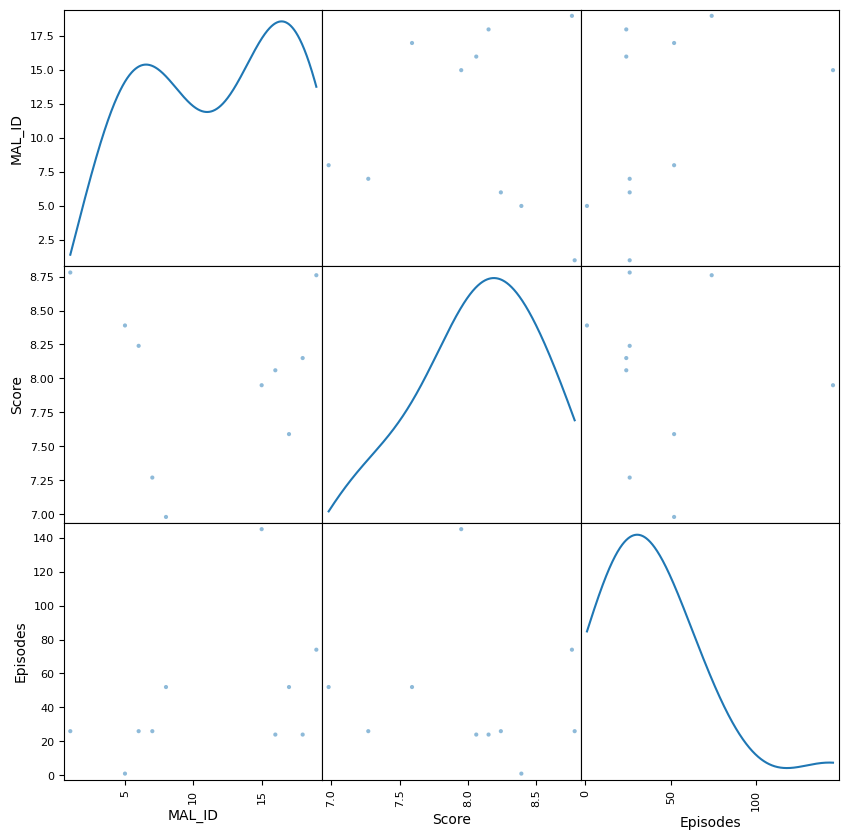

In [20]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Plot scatter matrix of the first 9 columns of df1
scatter_matrix(df1.iloc[:, :9], figsize=(10, 10), diagonal='kde')
plt.show()

In [21]:
df2 = pd.read_excel('rating.csv.xlsx', nrows = nRowsRead)
df2.dataframeName = 'rating.csv.xlsx'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 10 rows and 3 columns


In [22]:
df2.head(5)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


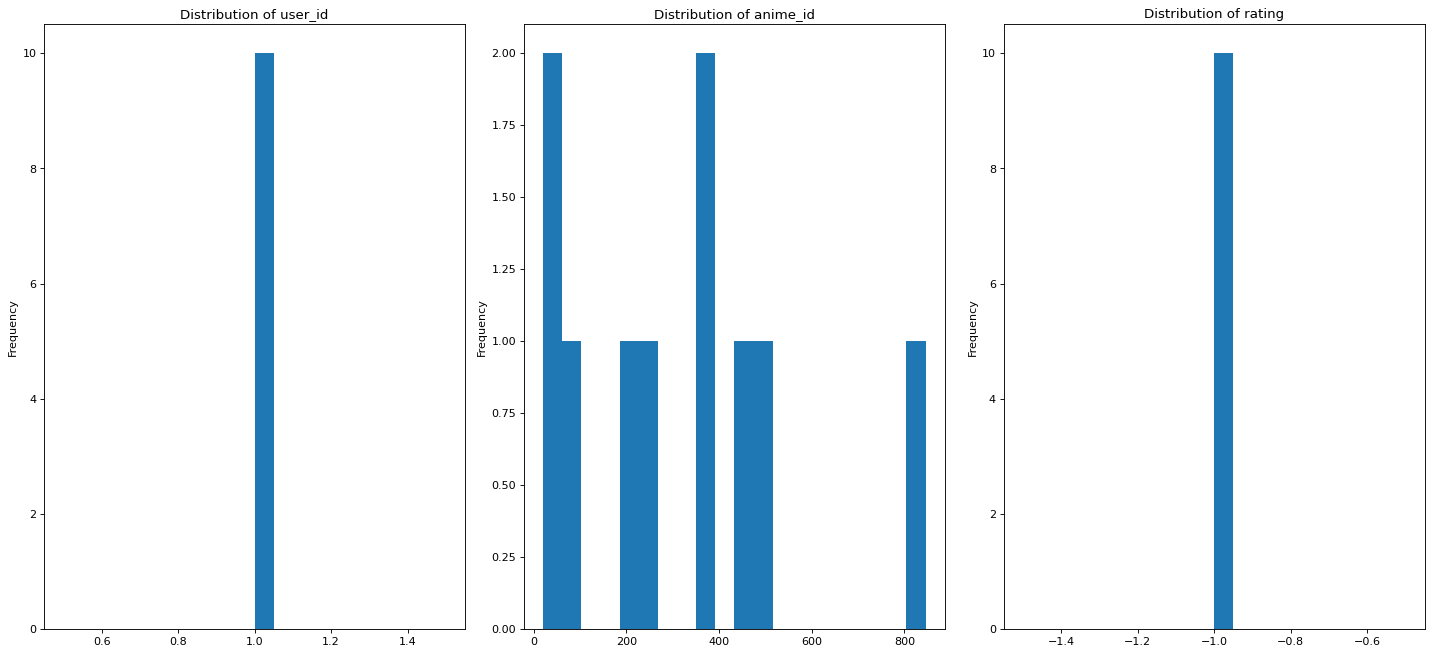

In [23]:
plotPerColumnDistribution(df2, 10, 5)

In [24]:
plotCorrelationMatrix(df=df2, graphWidth=5)

Not enough columns for correlation matrix in rating.csv.xlsx


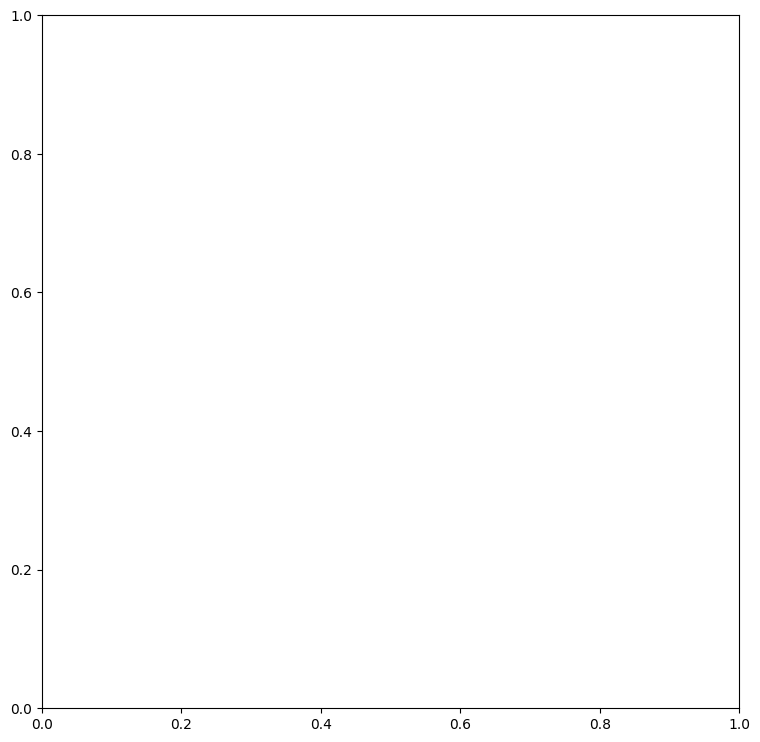

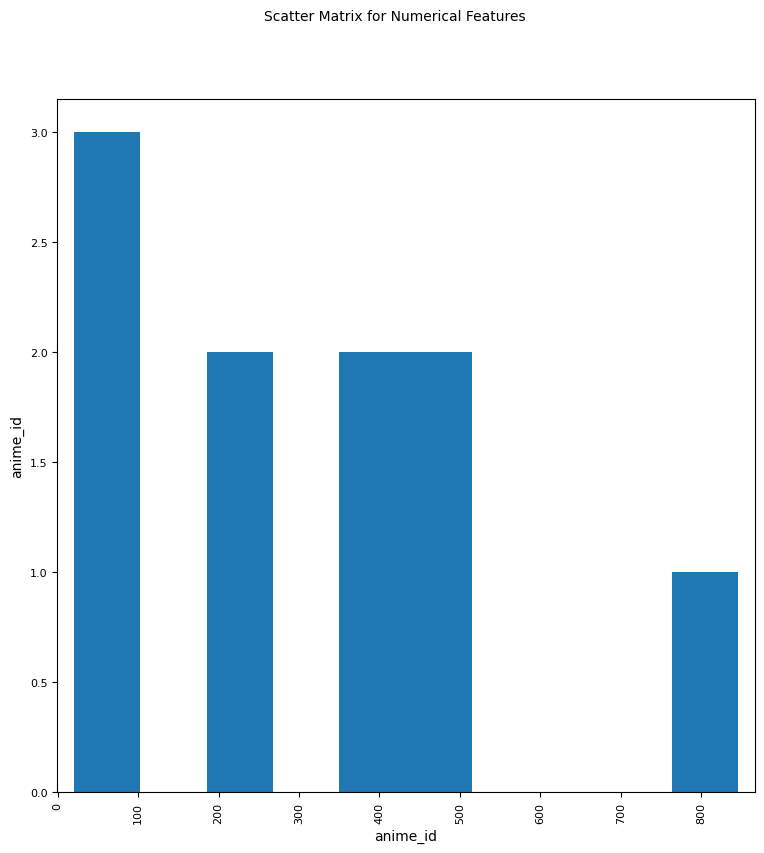

In [25]:
plotScatterMatrix(df2, 9, 10)